# projectXOR

### Build rust module to python package

In [7]:
%%bash
# Make sure rustc is already installed
pip install maturin
cd algo
maturin develop
pip install target/wheels/*.whl --force-reinstall

🔗 Found pyo3 bindings
🐍 Found CPython 3.11 at /home/satheeshkumar/.conda/envs/groot/bin/python
📡 Using build options features from pyproject.toml
   Compiling algo v0.1.0 (/home/satheeshkumar/Groot/projectXOR/algo)
    Finished dev [unoptimized + debuginfo] target(s) in 0.37s
📦 Built wheel for CPython 3.11 to /tmp/.tmpYaOsiC/algo-0.1.0-cp311-cp311-linux_x86_64.whl
🛠 Installed algo-0.1.0


Processing ./target/wheels/algo-0.1.0-cp311-cp311-manylinux_2_34_x86_64.whl
  Attempting uninstall: algo
    Found existing installation: algo 0.1.0
    Uninstalling algo-0.1.0:
      Successfully uninstalled algo-0.1.0


### Restart the kernal after installing it

In [1]:
import algo
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
dir(algo)
# It has four function (64bit precision)
# angle_to_repr, 
# repr_to_angle, 
# shift_range,
# xor,
# generate

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'algo',
 'angle_to_repr',
 'generate',
 'repr_to_angle',
 'shift_range',
 'xor']

In [3]:
# angle_to_repr (float) = range : 0(2^0 - 1) - 18446744073709551615(2^64 - 1)
print(algo.angle_to_repr(0.0))
print(algo.angle_to_repr(360.0))
print(algo.angle_to_repr(220.2364))
print(algo.angle_to_repr(0.00000000000000543))

0
18446744073709551615
11285123629208684544
278


In [4]:
# repr_to_angle (integer)
print(algo.repr_to_angle(0))
print(algo.repr_to_angle(18446744073709551615))
print(algo.repr_to_angle(11285123629208684544))
print(algo.repr_to_angle(278))

0.0
360.0
220.2364
5.425347671117464e-15


In [5]:
# xor(angle1, angle2)
algo.xor(220.34, 154.23)

338.92330265432287

In [6]:
# shift_range : it will done (angle & (end-start)) + start
algo.shift_range(338.92, 0.0, 50.0)

46.41725271541141

### generate matrix

In [7]:
def angle(n):
    return np.random.random(n) * 360

In [32]:
# Generate Square Matrix of size n
n = 10
a = angle(1)
row = np.append(a, angle(n-1))
column = np.append(a, angle(n-1))
print(row)
print(column)
data = algo.generate(row,column)
pd.DataFrame(data)

[ 31.87620021   1.85998053 252.96073807  99.10816915 236.32374714
 256.91099613 230.7296459  331.2239685  239.45103666 126.78072241]
[ 31.87620021 220.0056563   27.75406003 256.60549019 162.89532332
 175.35300009 221.55993107 340.18243522  32.33815093 300.57395341]


,0,1,2,3,4,5,6,7,8,9
0,31.876200,1.859981,252.960738,99.108169,236.323747,256.910996,230.729646,331.223968,239.451037,126.780722
1,220.005656,220.958916,65.754869,147.262640,270.995393,165.959743,295.438848,81.026830,207.909413,284.059604
2,27.754060,200.545445,225.518421,282.514637,11.706211,177.665413,242.226565,210.753390,8.474477,292.465716
3,256.605490,80.011834,214.781805,113.015967,123.831737,53.931227,194.204667,44.690209,36.217151,301.250003
4,162.895323,105.751776,297.467546,185.392863,309.173740,356.499433,168.197180,146.759622,159.773645,235.750211
5,175.353000,78.055457,320.679235,146.054352,264.414798,92.139662,76.107096,132.550603,67.324183,191.925540
6,221.559931,239.130108,109.718083,58.853489,210.755149,298.626565,318.194648,264.416386,207.907826,38.861660
7,340.182435,129.221799,30.770238,84.685330,238.923534,176.824889,224.958383,50.624415,247.717370,241.200000
8,32.338151,108.429037,125.131066,141.696601,288.488092,248.336905,66.622271,17.752922,265.387117,32.680865
9,300.573953,214.668536,270.507357,231.499973,148.683111,305.346916,346.302866,352.778236,98.992683,114.391362


### xor of two vectors

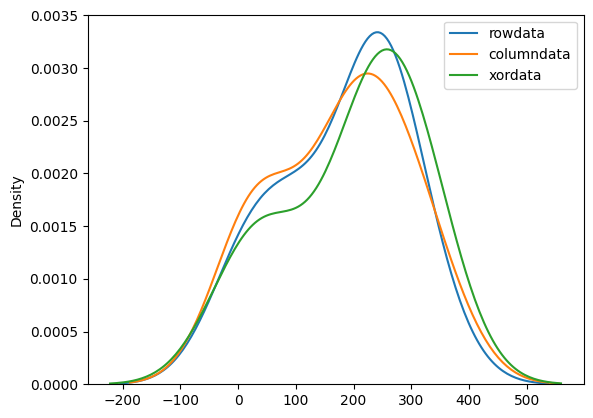

In [33]:
xordata = list(map(lambda x : algo.xor(x[0],x[1]), zip(row,column)))
sb.kdeplot(row, label="rowdata")
sb.kdeplot(column, label="columndata")
sb.kdeplot(xordata, label="xordata")
plt.legend()

### KdePlot

In [18]:
def plot(n):
    a = angle(1)
    row = np.append(a, angle(n-1))
    column = np.append(a, angle(n-1))
    data = np.array(algo.generate(row,column))
    sb.kdeplot(data[0],label="0th-row")
    sb.kdeplot(data[n-1],label="nth-row")
    plt.ylim(0,0.004)
    plt.legend()
    del(a)
    del(row)
    del(column)
    del(data)

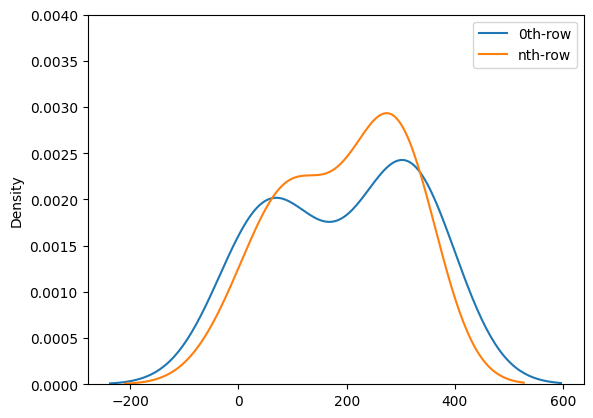

In [11]:
# n = 10
plot(10)

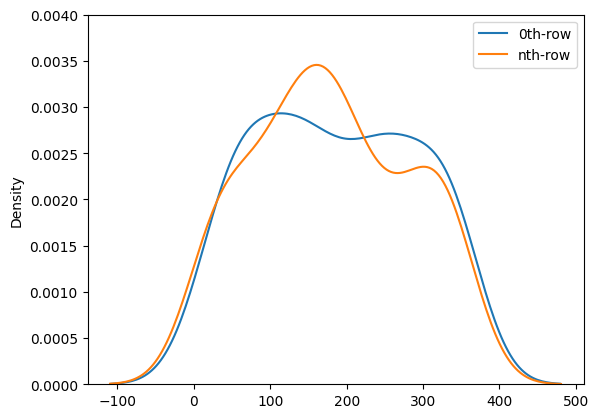

In [12]:
# n = 100
plot(100)

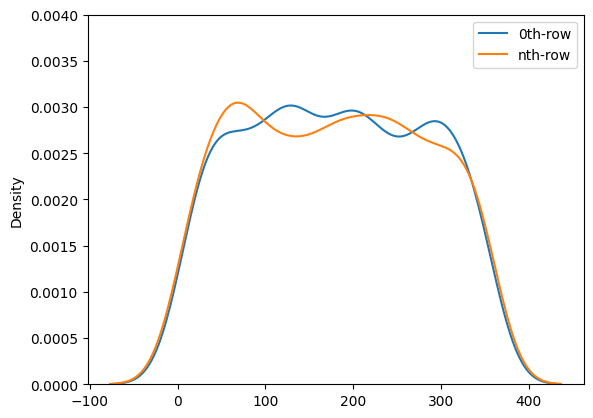

In [13]:
# n = 1000
plot(1000)

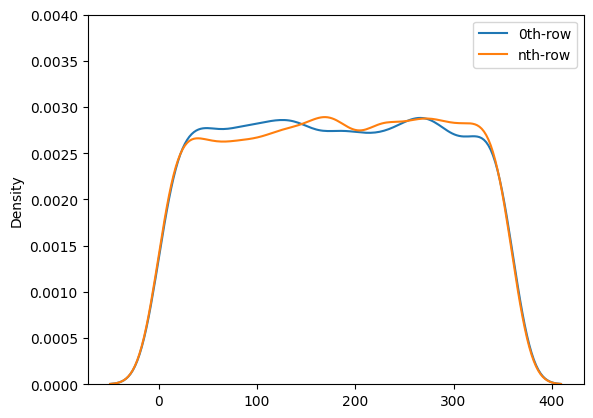

In [14]:
# n = 10000
plot(10000)

### To pdf

In [10]:
!jupyter nbconvert --to webpdf main.ipynb main.pdf
from IPython.display import clear_output
clear_output()